In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import pingouin as pg 
#from outliers import smirnov_grubbs as grubbs
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def AssignRank(df,col):
    rank=[]
    for i in df.index:
        hl=df[col][i]
        hl=float(df[col][i])
        if hl < 0.0208333:
            rank.append(7)
        elif 0.0208333 <= hl < 0.138889:
            rank.append(6)
        elif 0.138889 <= hl < 1:
            rank.append(5)
        elif 1 <= hl < 7:
            rank.append(4)
        elif 7 <= hl < 60:
            rank.append(3)
        elif 60 <= hl <= 365:
            rank.append(2)
        elif hl > 365:
            rank.append(1)
        else:
            rank.append('N/A')
            #rank.append(4)
    return rank

In [3]:
lit=pd.read_excel('Updated_AnaerobicRxn_LitLib_06132024_parentType.xlsx')

#omit data point that were reported for having a 'stable' half life for the purpose of this analysis
lit=lit[lit['HalfLife (days)']!='stable']
#drop rows with no half life
lit=lit[lit['HalfLife (days)'].notna()]
#drop rows with no rxn system
df=lit[lit['Rxn_System'].notna()==True]

In [6]:
ec_index=df[df['Rxn_System'].str.contains('digestion|bioreactor|reactor|column|fermentor|digest|sludge|wastewater|waste',case=False)].index
es_index=df[df['Rxn_System'].str.contains('strain|medium|culture|agar|suspension',case=False)].index
n_index=df[df['Rxn_System'].str.contains('soil|field|microcosm|sediment|aquifer|groundwater|in situ|slurry',case=False)].index

system=[]
for i in df.index:
    if i in ec_index:
        df['Natural_Engineered_Systems'][i]='Engineered; consortium'
    elif i in es_index:
        df['Natural_Engineered_Systems'][i]='Engineered; single strand'
    elif i in n_index:
        df['Natural_Engineered_Systems'][i]='Natural'
df[['Rxn_System','Natural_Engineered_Systems']]

,Rxn_System,Natural_Engineered_Systems
0,Lab microcosm,Natural
1,Lab microcosm,Natural
2,Lab microcosm,Natural
3,Lab microcosm,Natural
4,Lab microcosm,Natural
...,...,...
1132,soil samples in air tight glove chamber inflat...,Natural
1133,"Anaerobic digestion batch reactor, dairy manure",Engineered; consortium
1134,cyclone fermentor (anaerobic conditions),Engineered; consortium
1136,Subsoil samples taken beneath the water table ...,Natural


In [ ]:
#df.to_excel('Updated_AnaerobicRxn_LitLib_11042024.xlsx',index=False)

In [10]:
lit=pd.read_excel('Updated_AnaerobicRxn_LitLib_11052024.xlsx')
df=pd.read_excel('Updated_AnaerobicRxn_LitLib_11052024.xlsx')
df=df[df['HalfLife (days)'].notna()==True]

In [11]:
#remove Liu et al., 2007 datapoints because I tjhink they are aerobic
df=df[df['Reference']!='Liu et al., 2007']

In [12]:
len(lit['Rxn_Scheme'].unique())
len(df['Rxn_Scheme'].unique())

89

In [13]:
print('total:',len(df))
print('Engineered;Consortium:',len(df[df['Natural_Engineered_Systems']=='Engineered; consortium']))
print('Engineered;single strand:',len(df[df['Natural_Engineered_Systems']=='Engineered; single strand']))
print('Natural',len(df[df['Natural_Engineered_Systems']=='Natural']))

total: 819
Engineered;Consortium: 122
Engineered;single strand: 125
Natural 572


In [14]:
type(lit['Rank_4'][7])

numpy.float64

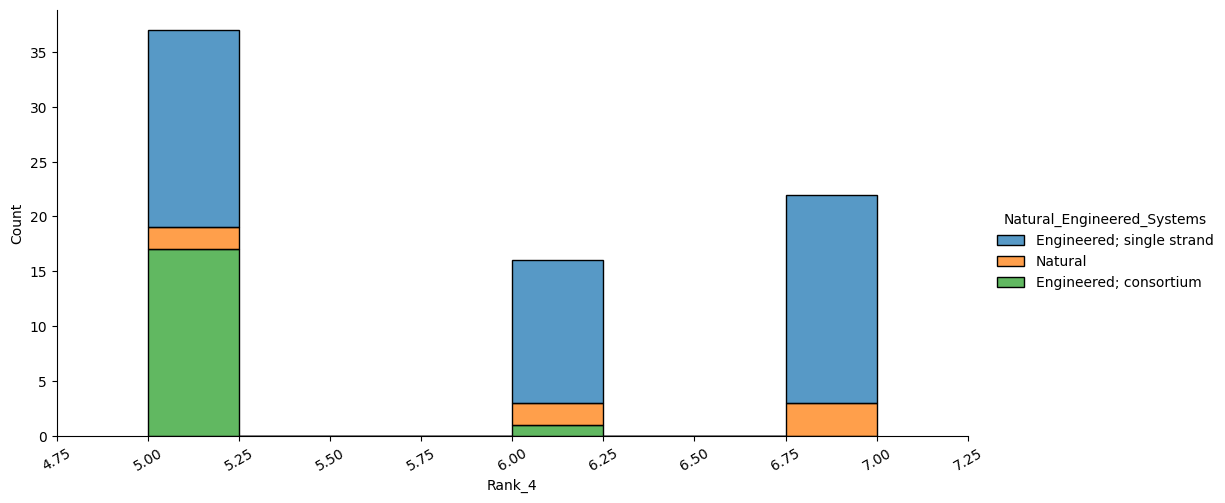

In [69]:
rList=[5,6,7]
sub=lit[lit['Rank_4'].isin(rList)==True]
ax=sns.displot(sub,x='Rank_4', hue='Natural_Engineered_Systems',multiple='stack', aspect=2)
ax.set_xticklabels(rotation=30)
plt.show()

In [78]:
sub.loc[sub['Rank_4']==7,'Natural_Engineered_Systems']

53     Engineered; single strand
146                      Natural
148                      Natural
149                      Natural
277    Engineered; single strand
278    Engineered; single strand
284    Engineered; single strand
564    Engineered; single strand
571    Engineered; single strand
572    Engineered; single strand
573    Engineered; single strand
637    Engineered; single strand
638    Engineered; single strand
639    Engineered; single strand
650    Engineered; single strand
651    Engineered; single strand
652    Engineered; single strand
661    Engineered; single strand
672    Engineered; single strand
683    Engineered; single strand
684    Engineered; single strand
686    Engineered; single strand
Name: Natural_Engineered_Systems, dtype: object

In [20]:
# g=sns.displot(df, x='Rxn_Scheme',hue='Natural_Engineered_Systems',multiple='stack')
# g.fig.set_figwidth(10)
# g.fig.set_figheight(11.7)

In [15]:
#get list of schemes that have keyword in rxn system
ec_schemes=list(df.loc[df['Natural_Engineered_Systems']=='Engineered; consortium','Rxn_Scheme'].unique())
es_schemes=list(df.loc[df['Natural_Engineered_Systems']=='Engineered; single strand','Rxn_Scheme'].unique())
nat_schemes=list(df.loc[df['Natural_Engineered_Systems']=='Natural','Rxn_Scheme'].unique())

In [16]:
print('# of ec schemes:', len(ec_schemes))
print('# of es schemes:', len(es_schemes))
print('# of natural schemes:', len(nat_schemes))
print('total number of schemes:', len(df['Rxn_Scheme'].unique()))

# of ec schemes: 31
# of es schemes: 55
# of natural schemes: 48
total number of schemes: 89


In [17]:
#make acombined list of engineered schemes
engineered=set(ec_schemes+es_schemes)
len(engineered)

70

In [18]:
len(set(nat_schemes)-engineered)

19

In [19]:
len(engineered-set(nat_schemes))

41

In [20]:
# how many schemes do engineered single strand and engineered consortium have in common?
set(ec_schemes).intersection(set(es_schemes))

{'Activation: CoA addition to substituted benzoate',
 'Addition: Methylbenzene to fumarate adduct',
 'Biotic Hydrolysis: Ureas',
 'Carboxylation: Napthalene to 2-napthyl carboxylic acid',
 'Carboxylation: Substituted phenol to para-hydroxybenzoic acid',
 'Dealkylation: O-demethylation of methyl ethers',
 'Diol dehydratase reaction to form acetaldehyde',
 'Hydroxylation: Alkyl benzene to sec-hydroxy benzene',
 'Oxidation: Aldehyde to carboxylic acid',
 'Reduction: Aldehyde to alcohol',
 'Reduction: Aromatic azobenzene to aromatic amines',
 'Reduction: Dehalogenation of aromatic halides',
 'Reduction: Hydrogenolysis of haloalkanes',
 'Reduction: Nitroaromatic to aromatic amine',
 'Reduction: Nitroimine to Nitrosamine',
 'Ring Opening: 1,3-Cyclohexadione'}

In [21]:
# how many scheme do engineered single strand and natural have in common
n_es_schemes=list(set(nat_schemes).intersection(set(es_schemes)))

In [22]:
# how many scheme do engineered consortium and natural have in common
n_ec_schemes=list(set(nat_schemes).intersection(set(ec_schemes)))

In [23]:
# how many scheme do engineered and natural have in common
n_e_schemes=list(set(nat_schemes).intersection(set(engineered)))

In [24]:
#get number of HL that 
n_ec=df[df['Rxn_Scheme'].isin(n_ec_schemes)==True]
print('# of enginered datapoints:', len(n_ec.loc[n_ec['Natural_Engineered_Systems']=='Engineered; consortium','HalfLife (days)']))
print('# of natural datapoints:', len(n_ec.loc[n_ec['Natural_Engineered_Systems']=='Natural','HalfLife (days)']))

# of enginered datapoints: 86
# of natural datapoints: 420


In [25]:
#get number of HL that 
n_es=df[df['Rxn_Scheme'].isin(n_es_schemes)==True]
print('# of enginered datapoints:', len(n_es.loc[n_es['Natural_Engineered_Systems']=='Engineered; single strand','HalfLife (days)']))
print('# of natural datapoints:', len(n_es.loc[n_es['Natural_Engineered_Systems']=='Natural','HalfLife (days)']))

# of enginered datapoints: 63
# of natural datapoints: 419


In [26]:
results=pd.DataFrame(columns=['Rxn_Scheme','Median_all','Median_natural','Median_singleStrang','Median_consortium','Mean_all','Mean_natural','Mean_singleStrang','Mean_consortium','PopSize_all','PopSize_natural','PopSize_singleStrand','PopSize_consortium'])
for i in df['Rxn_Scheme'].unique():
    pop_all=len(df.loc[df['Rxn_Scheme']==i,'HalfLife (days)'].astype(float))
    med_all=df.loc[df['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).median()
    avg_all=df.loc[df['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).mean()
    
    nat=df[df['Natural_Engineered_Systems']=='Natural']
    pop_nat=len(nat.loc[nat['Rxn_Scheme']==i,'HalfLife (days)'].astype(float))
    med_nat=nat.loc[nat['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).median()
    avg_nat=nat.loc[nat['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).mean()

    ec=df[df['Natural_Engineered_Systems']=='Engineered; consortium']
    pop_ec=len(ec.loc[ec['Rxn_Scheme']==i,'HalfLife (days)'].astype(float))
    med_ec=ec.loc[ec['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).median()
    avg_ec=ec.loc[ec['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).mean()

    es=df[df['Natural_Engineered_Systems']=='Engineered; single strand']
    pop_es=len(es.loc[es['Rxn_Scheme']==i,'HalfLife (days)'].astype(float))
    med_es=es.loc[es['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).median()
    avg_es=es.loc[es['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).mean()

    results.loc[len(results)]={'Rxn_Scheme' : i, 'Median_all': med_all,'Median_natural':med_nat,'Median_singleStrang':med_es,'Median_consortium':med_ec,'Mean_all': avg_all,'Mean_natural':avg_nat,'Mean_singleStrang':avg_es,
                               'Mean_consortium':avg_ec, 'PopSize_all':pop_all, 'PopSize_natural': pop_nat, 'PopSize_singleStrand': pop_es,'PopSize_consortium':pop_ec}
    #results=results[results['PopSize_natural']!=0]
results

,Rxn_Scheme,Median_all,Median_natural,Median_singleStrang,Median_consortium,Mean_all,Mean_natural,Mean_singleStrang,Mean_consortium,PopSize_all,PopSize_natural,PopSize_singleStrand,PopSize_consortium
0,Reduction: Hydrogenolysis of haloalkenes,239.933184,252.749850,3.478344,NaN,778.540311,801.336251,3.478344,NaN,70,68,2,0
1,Oxidation: Acetyl-CoA to carbon dioxide (TCA c...,10191.176471,10191.176471,NaN,NaN,6128.596915,6128.596915,NaN,NaN,10,10,0,0
2,Reduction: Nitroaromatic to aromatic amine,5.930680,187.297297,0.582806,0.001444,87.204185,161.387781,0.787701,0.001444,13,7,5,1
3,Addition: Methylbenzene to fumarate adduct,10.192647,11.001587,0.022071,1.386200,112.883422,119.607692,2.757382,1.330780,192,181,7,4
4,Hydrogenation: Phenol to cyclohexanone,10.192647,10.192647,NaN,NaN,34.180364,34.180364,NaN,NaN,13,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Biotic Hydrolysis: Enamines,18.240000,18.240000,NaN,NaN,18.240000,18.240000,NaN,NaN,1,1,0,0
85,Reduction: Nitroso imine to amine,18.240000,18.240000,NaN,NaN,18.240000,18.240000,NaN,NaN,1,1,0,0
86,Cleavage: (Methylsulfanyl)ethanimine carboxyl ...,0.256250,0.256250,NaN,NaN,0.256250,0.256250,NaN,NaN,2,2,0,0
87,Reduction: (Methylsulfanyl)methanimine carboxy...,0.041667,0.041667,NaN,NaN,0.041667,0.041667,NaN,NaN,2,2,0,0


In [28]:
#number of schemes that do not have natural data
print(len(results.loc[results['PopSize_natural']==0,'Rxn_Scheme'].unique()))

#number of scheme that are only natural
print(len(results.loc(results['PopSize_consortium'])

SyntaxError: incomplete input (1013172794.py, line 5)

In [30]:
testData=df[df['Rxn_Scheme'].isin(engineered)==True]
results=pd.DataFrame(columns=['Rxn_Scheme','Median_all','Median_natural','Median_singleStrang','Median_consortium','Mean_all','Mean_natural','Mean_singleStrang','Mean_consortium','PopSize_all','PopSize_natural','PopSize_singleStrand','PopSize_consortium'])
for i in engineered:
    pop_all=len(testData.loc[testData['Rxn_Scheme']==i,'HalfLife (days)'].astype(float))
    med_all=testData.loc[testData['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).median()
    avg_all=testData.loc[testData['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).mean()
    
    nat=testData[testData['Natural_Engineered_Systems']=='Natural']
    pop_nat=len(nat.loc[nat['Rxn_Scheme']==i,'HalfLife (days)'].astype(float))
    med_nat=nat.loc[nat['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).median()
    avg_nat=nat.loc[nat['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).mean()

    ec=testData[testData['Natural_Engineered_Systems']=='Engineered; consortium']
    pop_ec=len(ec.loc[ec['Rxn_Scheme']==i,'HalfLife (days)'].astype(float))
    med_ec=ec.loc[ec['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).median()
    avg_ec=ec.loc[ec['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).mean()

    es=testData[testData['Natural_Engineered_Systems']=='Engineered; single strand']
    pop_es=len(es.loc[es['Rxn_Scheme']==i,'HalfLife (days)'].astype(float))
    med_es=es.loc[es['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).median()
    avg_es=es.loc[es['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).mean()

    results.loc[len(results)]={'Rxn_Scheme' : i, 'Median_all': med_all,'Median_natural':med_nat,'Median_singleStrang':med_es,'Median_consortium':med_ec,'Mean_all': avg_all,'Mean_natural':avg_nat,'Mean_singleStrang':avg_es,
                               'Mean_consortium':avg_ec, 'PopSize_all':pop_all, 'PopSize_natural': pop_nat, 'PopSize_singleStrand': pop_es,'PopSize_consortium':pop_ec}
    #results=results[results['PopSize_natural']!=0]
results

,Rxn_Scheme,Median_all,Median_natural,Median_singleStrang,Median_consortium,Mean_all,Mean_natural,Mean_singleStrang,Mean_consortium,PopSize_all,PopSize_natural,PopSize_singleStrand,PopSize_consortium
0,Fermentation of dichloromethane,2.010930,108.281250,1.675746,NaN,37.210914,108.281250,1.675746,NaN,3,1,2,0
1,Oxidation: Primary alcohol to carboxylic acid,54.735744,12.954403,NaN,63.139996,339.827894,12.954403,NaN,399.259438,13,2,0,11
2,Carboxylation: Napthalene to 2-napthyl carboxy...,12.339609,24.251609,0.341671,37.476337,76.707116,122.945606,0.341671,37.476337,9,5,2,2
3,Oxidation: Diphenyl ether cleavage,4.108391,NaN,NaN,4.108391,3.882253,NaN,NaN,3.882253,8,0,0,8
4,Biotic Hydrolysis: Organophosphorus triester (...,5.400000,56.500000,NaN,5.400000,38.759670,64.369422,NaN,4.613333,7,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Oxidation: Aldehyde to carboxylic acid,0.222115,NaN,0.040566,0.245796,0.177386,NaN,0.040566,0.245796,3,0,1,2
66,Nucleophilic Substitution: Sulfide substitutio...,1.230000,NaN,1.230000,NaN,1.230000,NaN,1.230000,NaN,1,0,1,0
67,"Hydrogenation: 1,2,4-trihydroxybenzene to 1,2-...",0.018494,NaN,0.018494,NaN,0.018494,NaN,0.018494,NaN,1,0,1,0
68,Reduction: Isoxazole cleavage,4.048822,NaN,NaN,4.048822,8.945746,NaN,NaN,8.945746,4,0,0,4


In [32]:
len(results[results['PopSize_natural']!=0])

28

In [33]:
#add rank
d=dict(zip(testData['Rxn_Scheme'],testData['Rank_4']))
results['Rank_all']=results['Rxn_Scheme'].map(d)


In [34]:
#add rank for based on median without engineered rates (i.e natural)
rank=[]
for i in results.index:
    hl=results['Median_natural'][i]
    hl=float(results['Median_natural'][i])
    if hl < 0.0208333:
        rank.append(7)
    elif 0.0208333 <= hl < 0.138889:
        rank.append(6)
    elif 0.138889 <= hl < 1:
        rank.append(5)
    elif 1 <= hl < 7:
        rank.append(4)
    elif 7 <= hl < 60:
        rank.append(3)
    elif 60 <= hl <= 365:
        rank.append(2)
    elif hl > 365:
        rank.append(1)
    else:
        rank.append(4)
results['Rank_natural']=rank
results

,Rxn_Scheme,Median_all,Median_natural,Median_singleStrang,Median_consortium,Mean_all,Mean_natural,Mean_singleStrang,Mean_consortium,PopSize_all,PopSize_natural,PopSize_singleStrand,PopSize_consortium,Rank_all,Rank_natural
0,Fermentation of dichloromethane,2.010930,108.281250,1.675746,NaN,37.210914,108.281250,1.675746,NaN,3,1,2,0,4.0,2
1,Oxidation: Primary alcohol to carboxylic acid,54.735744,12.954403,NaN,63.139996,339.827894,12.954403,NaN,399.259438,13,2,0,11,3.0,3
2,Carboxylation: Napthalene to 2-napthyl carboxy...,12.339609,24.251609,0.341671,37.476337,76.707116,122.945606,0.341671,37.476337,9,5,2,2,3.0,3
3,Oxidation: Diphenyl ether cleavage,4.108391,NaN,NaN,4.108391,3.882253,NaN,NaN,3.882253,8,0,0,8,4.0,4
4,Biotic Hydrolysis: Organophosphorus triester (...,5.400000,56.500000,NaN,5.400000,38.759670,64.369422,NaN,4.613333,7,4,0,3,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Oxidation: Aldehyde to carboxylic acid,0.222115,NaN,0.040566,0.245796,0.177386,NaN,0.040566,0.245796,3,0,1,2,5.0,4
66,Nucleophilic Substitution: Sulfide substitutio...,1.230000,NaN,1.230000,NaN,1.230000,NaN,1.230000,NaN,1,0,1,0,4.0,4
67,"Hydrogenation: 1,2,4-trihydroxybenzene to 1,2-...",0.018494,NaN,0.018494,NaN,0.018494,NaN,0.018494,NaN,1,0,1,0,7.0,4
68,Reduction: Isoxazole cleavage,4.048822,NaN,NaN,4.048822,8.945746,NaN,NaN,8.945746,4,0,0,4,4.0,4


In [75]:
#results.to_excel('EngineeredVsNatural_desctiptiveStats.xlsx',index=False)

In [35]:
nat=list(testData.loc[testData['Natural_Engineered_Systems']=='Natural','HalfLife (days)'].astype(float))
ec=list(testData.loc[testData['Natural_Engineered_Systems']=='Engineered; consortium','HalfLife (days)'].astype(float))
es=list(testData.loc[testData['Natural_Engineered_Systems']=='Engineered; single strand','HalfLife (days)'].astype(float))

scipy.stats.f_oneway(nat,ec,es)

F_onewayResult(statistic=5.754026684435941, pvalue=0.0033098876797418852)

pvalue is 0.003 which is less than alpha at 0.05, therefore there is some difference between the means that is sig. different.
Use a tukey's test to determine which groups are different.

In [30]:
res=scipy.stats.tukey_hsd(nat,ec,es)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    159.116     0.076   -12.781   331.014
 (0 - 2)    214.418     0.009    44.199   384.638
 (1 - 0)   -159.116     0.076  -331.014    12.781
 (1 - 2)     55.302     0.822  -162.087   272.692
 (2 - 0)   -214.418     0.009  -384.638   -44.199
 (2 - 1)    -55.302     0.822  -272.692   162.087



based on the results of Tukey's, the mean of natural HL was significantly different than the mean of enginnered; single strand HL (comparison 0-2)

In [54]:
#f.loc[df['Natural_Engineered_Systems']=='Engineered; single strand','HalfLife (days)'].describe()
df.loc[df['Natural_Engineered_Systems']=='Engineered; single strand','HalfLife (days)'].median()

0.1110576923076923

In [55]:
#df.loc[df['Natural_Engineered_Systems']=='Natural','HalfLife (days)'].describe()
df.loc[df['Natural_Engineered_Systems']=='Natural','HalfLife (days)'].median()

20.385294117647

In [56]:
#df.loc[df['Natural_Engineered_Systems']=='Engineered; consortium','HalfLife (days)'].describe()
df.loc[df['Natural_Engineered_Systems']=='Engineered; consortium','HalfLife (days)'].median()

4.1076391465

<Axes: >

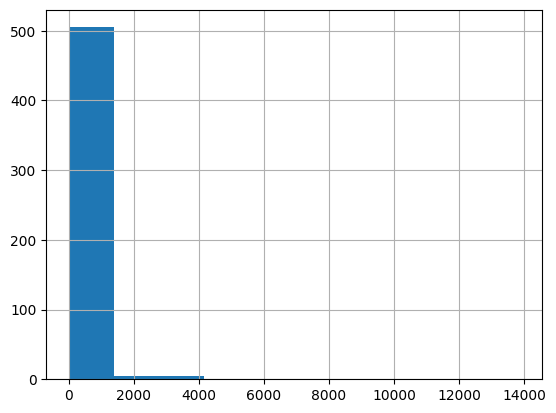

In [99]:
nat=testData.loc[testData['Natural_Engineered_Systems']=='Natural','HalfLife (days)']
nat.hist()

<Axes: >

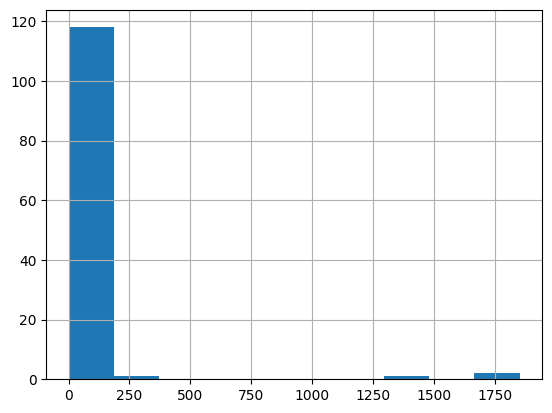

In [100]:
ec=testData.loc[testData['Natural_Engineered_Systems']=='Engineered; consortium','HalfLife (days)']
ec.hist()

<Axes: >

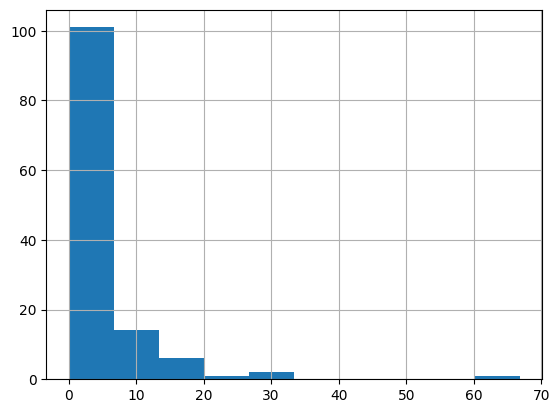

In [101]:
es=testData.loc[testData['Natural_Engineered_Systems']=='Engineered; single strand','HalfLife (days)']
es.hist()

## Outliers

In [36]:
z_scores=stats.zscore(testData['HalfLife (days)'])

# Convert the z-scores to absolute values
abs_z_scores = np.abs(z_scores)
testData['z_score']=abs_z_scores

# Select data points with a z-scores above or below 3
filt_testData=testData.loc[testData['z_score']<3]

In [37]:
results=pd.DataFrame(columns=['Rxn_Scheme','Median_all','Median_natural','Median_singleStrang','Median_consortium','Mean_all','Mean_natural','Mean_singleStrang','Mean_consortium','PopSize_all','PopSize_natural','PopSize_singleStrand','PopSize_consortium'])
for i in engineered:
    pop_all=len(filt_testData.loc[filt_testData['Rxn_Scheme']==i,'HalfLife (days)'].astype(float))
    med_all=filt_testData.loc[filt_testData['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).median()
    avg_all=testData.loc[testData['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).mean()
    
    nat=filt_testData[filt_testData['Natural_Engineered_Systems']=='Natural']
    pop_nat=len(nat.loc[nat['Rxn_Scheme']==i,'HalfLife (days)'].astype(float))
    med_nat=nat.loc[nat['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).median()
    avg_nat=nat.loc[nat['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).mean()

    ec=filt_testData[filt_testData['Natural_Engineered_Systems']=='Engineered; consortium']
    pop_ec=len(ec.loc[ec['Rxn_Scheme']==i,'HalfLife (days)'].astype(float))
    med_ec=ec.loc[ec['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).median()
    avg_ec=ec.loc[ec['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).mean()

    es=filt_testData[filt_testData['Natural_Engineered_Systems']=='Engineered; single strand']
    pop_es=len(es.loc[es['Rxn_Scheme']==i,'HalfLife (days)'].astype(float))
    med_es=es.loc[es['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).median()
    avg_es=es.loc[es['Rxn_Scheme']==i,'HalfLife (days)'].astype(float).mean()

    results.loc[len(results)]={'Rxn_Scheme' : i, 'Median_all': med_all,'Median_natural':med_nat,'Median_singleStrang':med_es,'Median_consortium':med_ec,'Mean_all': avg_all,'Mean_natural':avg_nat,'Mean_singleStrang':avg_es,
                               'Mean_consortium':avg_ec, 'PopSize_all':pop_all, 'PopSize_natural': pop_nat, 'PopSize_singleStrand': pop_es,'PopSize_consortium':pop_ec}
    #results=results[results['PopSize_natural']!=0]
    
    #add rank
    d=dict(zip(filt_testData['Rxn_Scheme'],filt_testData['Rank_4']))
    results['Rank_all_wRevision']=results['Rxn_Scheme'].map(d)

    #add rank for based on median without engineered rates (i.e natural)
    results['Rank_all_noRevision']=AssignRank(results,'Median_all')
    results['Rank_natural']=AssignRank(results,'Median_natural')
results

,Rxn_Scheme,Median_all,Median_natural,Median_singleStrang,Median_consortium,Mean_all,Mean_natural,Mean_singleStrang,Mean_consortium,PopSize_all,PopSize_natural,PopSize_singleStrand,PopSize_consortium,Rank_all_wRevision,Rank_all_noRevision,Rank_natural
0,Fermentation of dichloromethane,2.010930,108.281250,1.675746,NaN,37.210914,108.281250,1.675746,NaN,3,1,2,0,4.0,4,2
1,Oxidation: Primary alcohol to carboxylic acid,54.735744,12.954403,NaN,63.139996,339.827894,12.954403,NaN,399.259438,13,2,0,11,3.0,3,3
2,Carboxylation: Napthalene to 2-napthyl carboxy...,12.339609,24.251609,0.341671,37.476337,76.707116,122.945606,0.341671,37.476337,9,5,2,2,3.0,3,3
3,Oxidation: Diphenyl ether cleavage,4.108391,NaN,NaN,4.108391,3.882253,NaN,NaN,3.882253,8,0,0,8,4.0,4,N/A
4,Biotic Hydrolysis: Organophosphorus triester (...,5.400000,56.500000,NaN,5.400000,38.759670,64.369422,NaN,4.613333,7,4,0,3,4.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Oxidation: Aldehyde to carboxylic acid,0.222115,NaN,0.040566,0.245796,0.177386,NaN,0.040566,0.245796,3,0,1,2,5.0,5,N/A
66,Nucleophilic Substitution: Sulfide substitutio...,1.230000,NaN,1.230000,NaN,1.230000,NaN,1.230000,NaN,1,0,1,0,4.0,4,N/A
67,"Hydrogenation: 1,2,4-trihydroxybenzene to 1,2-...",0.018494,NaN,0.018494,NaN,0.018494,NaN,0.018494,NaN,1,0,1,0,7.0,7,N/A
68,Reduction: Isoxazole cleavage,4.048822,NaN,NaN,4.048822,8.945746,NaN,NaN,8.945746,4,0,0,4,4.0,4,N/A


In [38]:
nat=list(filt_testData.loc[filt_testData['Natural_Engineered_Systems']=='Natural','HalfLife (days)'].astype(float))
ec=list(filt_testData.loc[filt_testData['Natural_Engineered_Systems']=='Engineered; consortium','HalfLife (days)'].astype(float))
es=list(filt_testData.loc[filt_testData['Natural_Engineered_Systems']=='Engineered; single strand','HalfLife (days)'].astype(float))

scipy.stats.f_oneway(nat,ec,es)

F_onewayResult(statistic=14.187619973774867, pvalue=8.958640891457046e-07)

In [39]:
res=scipy.stats.tukey_hsd(nat,ec,es)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     61.779     0.023     6.851   116.708
 (0 - 2)    117.082     0.000    62.686   171.477
 (1 - 0)    -61.779     0.023  -116.708    -6.851
 (1 - 2)     55.302     0.147   -13.993   124.598
 (2 - 0)   -117.082     0.000  -171.477   -62.686
 (2 - 1)    -55.302     0.147  -124.598    13.993



array([[<Axes: title={'center': 'HalfLife (days)'}>]], dtype=object)

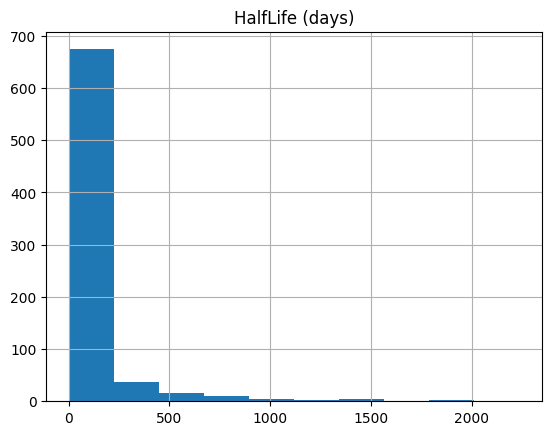

In [40]:
filt_testData.hist('HalfLife (days)')

In [41]:
nat=filt_testData.loc[filt_testData['Natural_Engineered_Systems']=='Natural']
ec=filt_testData.loc[filt_testData['Natural_Engineered_Systems']=='Engineered; consortium']
es=filt_testData.loc[filt_testData['Natural_Engineered_Systems']=='Engineered; single strand']

In [42]:
nat['HalfLife (days)'].median()

20.385294117647

In [43]:
ec['HalfLife (days)'].median()

4.1076391465

In [44]:
es['HalfLife (days)'].median()

0.1110576923076923

In [45]:
impact=[]
for i in results.index:
    all=results['Rank_all_noRevision'][i]
    nat=results['Rank_natural'][i]
    allR=results['Rank_all_wRevision'][i]
    if nat == 'N/A':
        impact.append('No Impact')
    elif nat == allR:
        impact.append('No Impact')
    elif all != nat:
        impact.append('Impact')
    else:
        impact.append('No Impact')
results['Impact']=impact

In [46]:
results[results['Impact']=='Impact']

,Rxn_Scheme,Median_all,Median_natural,Median_singleStrang,Median_consortium,Mean_all,Mean_natural,Mean_singleStrang,Mean_consortium,PopSize_all,PopSize_natural,PopSize_singleStrand,PopSize_consortium,Rank_all_wRevision,Rank_all_noRevision,Rank_natural,Impact
0,Fermentation of dichloromethane,2.010930,108.281250,1.675746,NaN,37.210914,108.281250,1.675746,NaN,3,1,2,0,4.0,4,2,Impact
4,Biotic Hydrolysis: Organophosphorus triester (...,5.400000,56.500000,NaN,5.400000,38.759670,64.369422,NaN,4.613333,7,4,0,3,4.0,4,3,Impact
39,Dealkylation: O-demethylation of methyl ethers,4.481086,12.874265,0.059116,6.196816,9.857503,15.542509,0.899274,11.106527,16,7,5,4,4.0,4,3,Impact
51,Biotic Hydrolysis: Amides,16.750000,90.475000,NaN,16.400000,73.990950,88.388688,NaN,16.400000,5,4,0,1,3.0,3,2,Impact
52,Reduction: Nitroaromatic to aromatic amine,5.930680,187.297297,0.582806,0.001444,87.204185,161.387781,0.787701,0.001444,13,7,5,1,4.0,4,2,Impact
57,Hydroxylation: Pyridine,5.775000,20.212500,0.000209,NaN,20.716958,24.169750,0.000209,NaN,7,6,1,0,4.0,4,3,Impact
62,Carboxylation: Substituted benzene to substitu...,3.300000,8.662500,1.789177,NaN,5.569445,8.308470,4.199932,NaN,21,7,14,0,4.0,4,3,Impact
63,Biotic Hydrolysis: Carbamates,3.300000,217.770833,NaN,3.300000,74.790278,217.770833,NaN,3.300000,6,2,0,4,4.0,4,2,Impact


In [45]:
results.to_excel('EngineeredVsNatural_descriptiveStats_noOutliers.xlsx',index=False)

In [57]:
sns.displot(lit

,Scheme,Category,Rxn_Type,Rxn,Rxn_Scheme,Redox,LibDoc_Check,LibDoc_Check_Notes,Parent_Type,Parent,...,RateConstant_avg,RateConstant_avg2,QA_Check,QA_Revisions,QA_Rate,QA_HalfLife,Reference,DOI,std_Parent_SMILES,std_Product_SMILES
0,NaN,Reduction,Reduction,Hydrogenolysis of haloalkenes,Reduction: Hydrogenolysis of haloalkenes,Fe,NaN,NaN,Intermediate,Vinyl chloride,...,NaN,NaN,NaN,NaN,NaN,NaN,"Bradley,PM & Chapelle,FH (1996)",10.1021/es950926k,C=CCl,O=C=O
1,NaN,Reduction,Reduction,Hydrogenolysis of haloalkenes,Reduction: Hydrogenolysis of haloalkenes,Fe,NaN,NaN,Intermediate,Vinyl chloride,...,NaN,NaN,NaN,NaN,NaN,NaN,"Bradley,PM & Chapelle,FH (1996)",10.1021/es950926k,C=CCl,O=C=O
2,NaN,Reduction,Reduction,Hydrogenolysis of haloalkenes,Reduction: Hydrogenolysis of haloalkenes,Fe,NaN,NaN,Intermediate,Vinyl chloride,...,NaN,NaN,NaN,NaN,NaN,NaN,"Bradley,PM & Chapelle,FH (1996)",10.1021/es950926k,C=CCl,O=C=O
3,Benzoate Biodegradation,Oxidation,Oxidation,Acetyl-CoA to carbon dioxide (TCA cycle),Oxidation: Acetyl-CoA to carbon dioxide (TCA c...,Fe,NaN,NaN,Intermediate,Acetic acid,...,NaN,0.000068,Acetic acid likely requires a CoA activation b...,NaN,NaN,NaN,"Chapelle,FH & Lovley,DR (1990)",10.1128/aem.56.6.1865-1874.1990,CC(=O)O,O=C=O
4,Benzoate Biodegradation,Oxidation,Oxidation,Acetyl-CoA to carbon dioxide (TCA cycle),Oxidation: Acetyl-CoA to carbon dioxide (TCA c...,Fe,NaN,NaN,Intermediate,Acetic acid,...,NaN,0.000068,Acetic acid likely requires a CoA activation b...,NaN,NaN,NaN,"Chapelle,FH & Lovley,DR (1990)",10.1128/aem.56.6.1865-1874.1990,CC(=O)O,O=C=O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,NaN,Hydroxylation,NaN,NaN,Hydroxylation: Diphenylmethane to diphenylmeth...,NaN,NaN,NaN,Intermediate,bis(4-chlorophenyl)methane,...,NaN,NaN,Transformation shown in Fig.2; no rate informa...,NaN,NaN,NaN,"Aislabie et al., 1997",10.1080/00288233.1997.9513247,Clc1ccc(Cc2ccc(Cl)cc2)cc1,OC(c1ccc(Cl)cc1)c1ccc(Cl)cc1
1142,NaN,Decarboxylation,NaN,NaN,Decarboxylation: Diphenylacetic acid to diphen...,NaN,NaN,NaN,Initial,Bis(4-chlorophenyl)acetic acid,...,NaN,NaN,Transformation shown in Fig.2; no rate informa...,NaN,NaN,NaN,"Aislabie et al., 1997",10.1080/00288233.1997.9513247,O=C(O)C(c1ccc(Cl)cc1)c1ccc(Cl)cc1,Clc1ccc(Cc2ccc(Cl)cc2)cc1
1143,NaN,Decarboxylation,NaN,NaN,Decarboxylation: Diphenylacetic acid to diphen...,NaN,NaN,NaN,Initial,Bis(4-chlorophenyl)acetic acid,...,NaN,NaN,Transformation shown in Fig 3.; no rate inform...,NaN,NaN,NaN,"Yu et al., 2011",10.1021/es2006397,O=C(O)C(c1ccc(Cl)cc1)c1ccc(Cl)cc1,Clc1ccc(Cc2ccc(Cl)cc2)cc1
1144,NaN,Oxidation,NaN,NaN,Oxidation: Diphenylmethanol to benzophenone,NaN,NaN,NaN,Intermediate,"4,4'-dichlorobenzhydrol",...,NaN,NaN,Transformation shown in Fig.2; no rate informa...,NaN,NaN,NaN,"Aislabie et al., 1997",10.1080/00288233.1997.9513247,OC(c1ccc(Cl)cc1)c1ccc(Cl)cc1,O=C(c1ccc(Cl)cc1)c1ccc(Cl)cc1
